In [27]:
# Test for package
import nltk
import docx
import os

from nltk.translate.bleu_score import sentence_bleu
import matplotlib.pyplot as plt

In [28]:
# Method to read .docx files

def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)

In [29]:
# Load all candidate data
os.chdir('Candidate Data/')

    # Load Vicuna data
os.chdir('Vicuna/')
vicunaPaths = os.listdir()
vicunaPaths.sort()

vicunaCandidates = []
for file in vicunaPaths:
    vicunaCandidates.append(getText(file))

os.chdir('..')

    # Load LLaMA data
os.chdir('LLaMA/')
llamaPaths = os.listdir()
llamaPaths.sort()

llamaCandidates = []
for file in llamaPaths:
    llamaCandidates.append(getText(file))

os.chdir('..')

    # Load Alpaca data
os.chdir('Alpaca/')
alpacaPaths = os.listdir()
alpacaPaths.sort()

alpacaCandidates = []
for file in alpacaPaths:
    alpacaCandidates.append(getText(file))

os.chdir('..')

    # Load WizardLM data
os.chdir('WizardLM/')
wizardPaths = os.listdir()
wizardPaths.sort()

wizardCandidates = []
for file in wizardPaths:
    wizardCandidates.append(getText(file))

os.chdir('..')

    # Load Guanaco data
os.chdir('Guanaco/')
guanacoPaths = os.listdir()
guanacoPaths.sort()

guanacoCandidates = []
for file in guanacoPaths:
    guanacoCandidates.append(getText(file))

os.chdir('..')

    # Load FDR Model data
os.chdir('FDR Model/')
FDRPaths = os.listdir()
FDRPaths.sort()

FDRCandidates = []
for file in FDRPaths:
    FDRCandidates.append(getText(file))

os.chdir('..')

os.chdir('..')

In [35]:
# Load all reference data

os.chdir('Reference Data/')
referencePaths = os.listdir()
referencePaths.sort()

llamaScores = []
vicunaScores = []
alpacaScores = []
wizardScores = []
guanacoScores = []
FDRScores = []

reference = []
for file, index in zip(referencePaths, range(10)):
    reference = getText(file).split()

    print('Prompt {}: '.format(index))

    vicunaScores.append(sentence_bleu(reference, vicunaCandidates[index]))
    print('Score Vicuna: {}'.format(vicunaScores[index]))

    llamaScores.append(sentence_bleu(reference, llamaCandidates[index]))
    print('Score LLaMA: {}'.format(llamaScores[index]))

    alpacaScores.append(sentence_bleu(reference, alpacaCandidates[index]))
    print('Score Alpaca: {}'.format(alpacaScores[index]))

    wizardScores.append(sentence_bleu(reference, wizardCandidates[index]))
    print('Score WizardLM: {}'.format(wizardScores[index]))

    guanacoScores.append(sentence_bleu(reference, guanacoCandidates[index]))
    print('Score Guanaco: {}'.format(guanacoScores[index]))

    FDRScores.append(sentence_bleu(reference, FDRCandidates[index]))
    print('Score FDR Model: {}'.format(FDRScores[index]))

    print()

    # Go back
os.chdir('..')

Prompt 0: 
Score Vicuna: 0.1334261082503565
Score LLaMA: 0.14984450182542272
Score Alpaca: 0.14170808052704212
Score WizardLM: 0.18966169706258232
Score Guanaco: 0.16229970723699805
Score FDR Model: 0.009668318769275423

Prompt 1: 
Score Vicuna: 0.10790250811745826
Score LLaMA: 0.12385009188943334
Score Alpaca: 0.1254795453677644
Score WizardLM: 0.13741369949633864
Score Guanaco: 0.1242364622407114
Score FDR Model: 0.07878367298250687

Prompt 2: 
Score Vicuna: 0.15128410804203973
Score LLaMA: 0.12047971502564735
Score Alpaca: 0.1441645473465754
Score WizardLM: 0.16219532167378045
Score Guanaco: 0.11188808464759346
Score FDR Model: 0.10866881129678686

Prompt 3: 
Score Vicuna: 0.14217224747135587
Score LLaMA: 0.12454574924907587
Score Alpaca: 0.16869596236008996
Score WizardLM: 0.1587207836688912
Score Guanaco: 0.12959420114676654
Score FDR Model: 0

Prompt 4: 
Score Vicuna: 0.10838976994036544
Score LLaMA: 0.11433389446714246
Score Alpaca: 0.14649822034255475
Score WizardLM: 0.15434911

In [34]:
os.chdir('..')

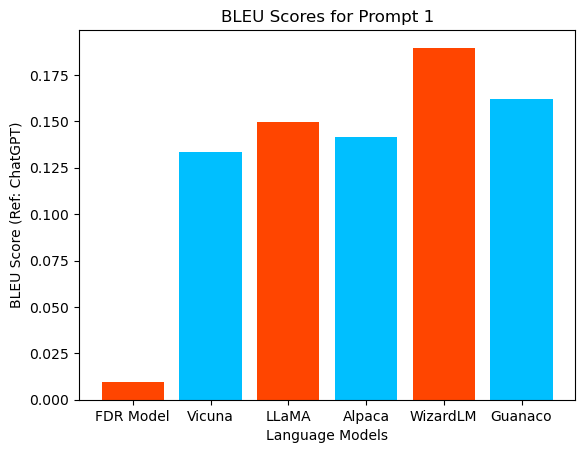

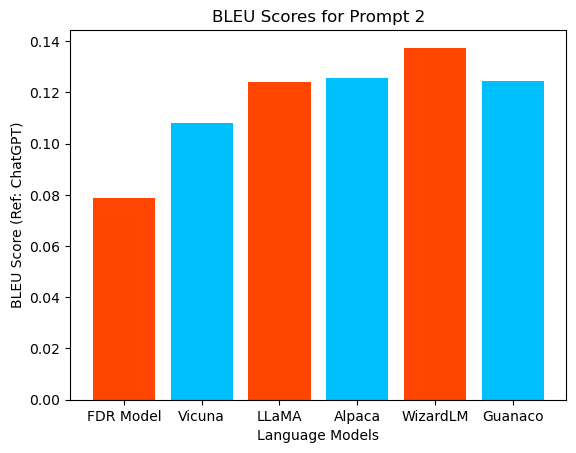

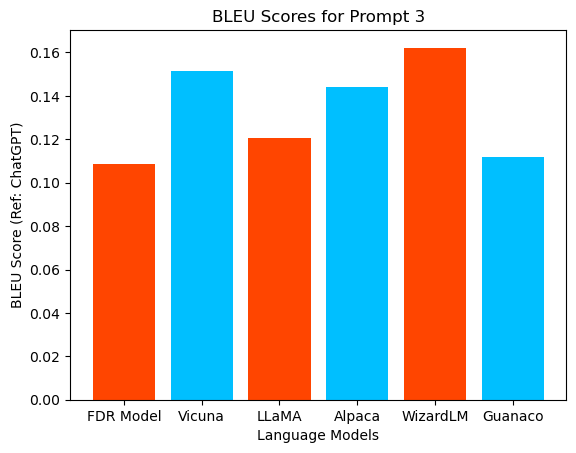

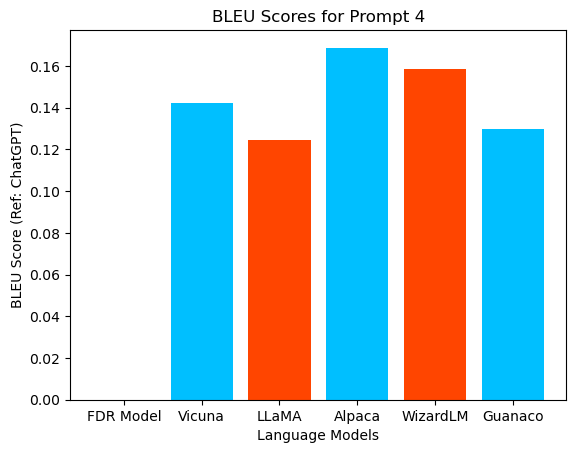

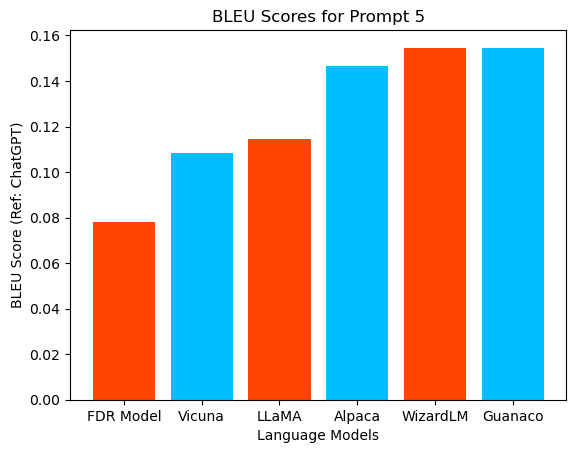

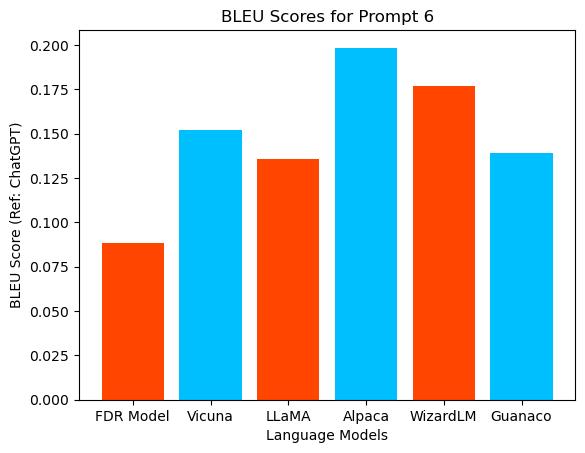

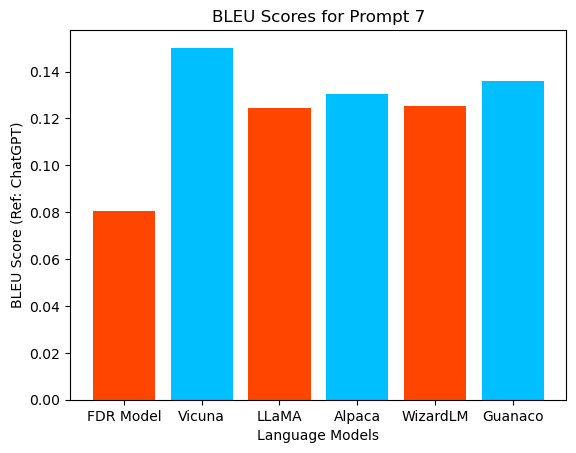

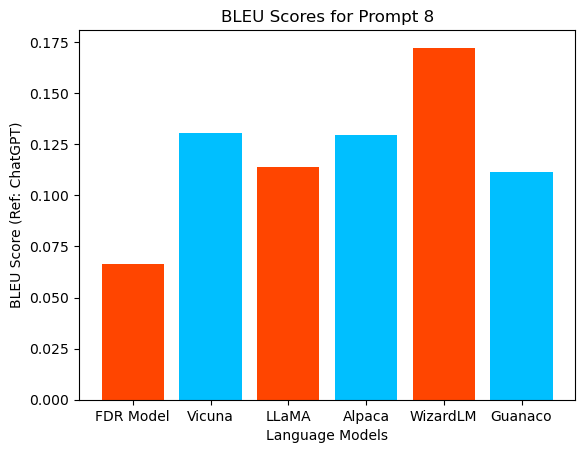

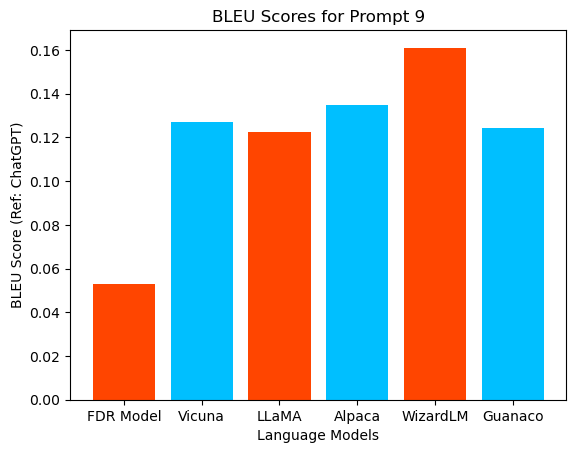

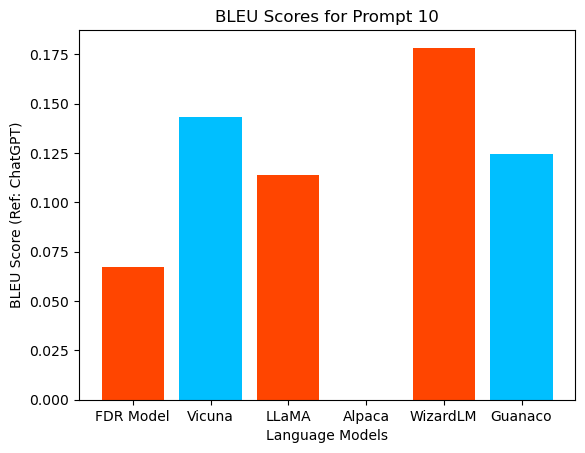

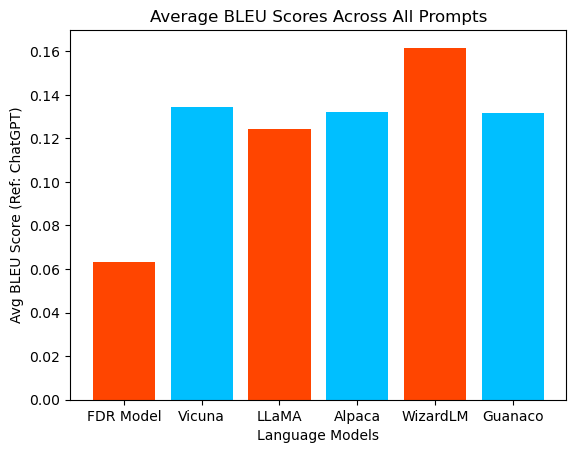

In [42]:
# Graph Generation

length = range(6)
left = []
for index in length:
    left.append(index + 1)

for index in range(10):
    
    # Data points
    data = [FDRScores[index], vicunaScores[index], llamaScores[index], alpacaScores[index], wizardScores[index], guanacoScores[index]]

    # Data labels
    labels = ['FDR Model', 'Vicuna', 'LLaMA', 'Alpaca', 'WizardLM', 'Guanaco']

    # Draw bars
    plt.bar(left, data, tick_label = labels, width = 0.8, color = ['orangered', 'deepskyblue'])

    # Bar labels
    # for i in range(len(labels)):
    #     plt.text(i + 1, data[i]/2, '%.5f' % data[i], ha = 'center')

    # x-axis label
    plt.xlabel('Language Models')

    # y-axis label
    plt.ylabel('BLEU Score (Ref: ChatGPT)')

    # Graph title
    plt.title('BLEU Scores for Prompt {}'.format(index + 1))

    # Show graph
    plt.show()

# Generate avg

fdrSum = 0
vicunaSum = 0
llamaSum = 0
alpacaSum = 0
wizardSum = 0
guanacoSum = 0

for index in range(10):
    fdrSum += FDRScores[index]
    vicunaSum += vicunaScores[index]
    llamaSum += llamaScores[index]
    alpacaSum += alpacaScores[index]
    wizardSum += wizardScores[index]
    guanacoSum += guanacoScores[index]

data = [fdrSum/10, vicunaSum/10, llamaSum/10, alpacaSum/10, wizardSum/10, guanacoSum/10]
labels = ['FDR Model', 'Vicuna', 'LLaMA', 'Alpaca', 'WizardLM', 'Guanaco']
plt.bar(left, data, tick_label = labels, width = 0.8, color = ['orangered', 'deepskyblue'])
# x-axis label
plt.xlabel('Language Models')

# y-axis label
plt.ylabel('Avg BLEU Score (Ref: ChatGPT)')

# Graph title
plt.title('Average BLEU Scores Across All Prompts')

# Show graph
plt.show()

